<a href="https://colab.research.google.com/github/41275030H/FINAL-PROJECT-/blob/main/%E8%8C%83%E9%87%91%E6%BD%A4_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
vgs = pd.read_csv('/content/drive/MyDrive/vgs /vgss.csv')

vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vgs.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
vgs.shape

(16598, 11)

In [ ]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
zero = (vgs["Other_Sales"] == 0)
vgs.loc[zero, "Other_Sales"] = vgs["Global_Sales"]
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.01,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.01,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.01,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.01,0.01


In [ ]:
vgs['Year'].fillna(method='ffill', inplace=True)
vgs.isnull().sum()
vgs["Publisher"].fillna("No Publisher", inplace = True)
vgs.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

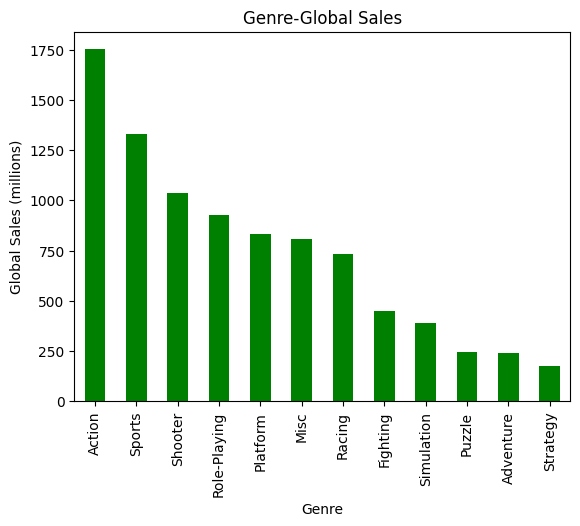

In [ ]:
genre_sales = vgs.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

#Creating the first visualization.
genre_sales.plot(kind='bar', color='green')
plt.title('Genre-Global Sales')    #labelling the data
plt.xlabel('Genre')  #labelling the x-label
plt.ylabel('Global Sales (millions)') #labelling the y-label
plt.show()

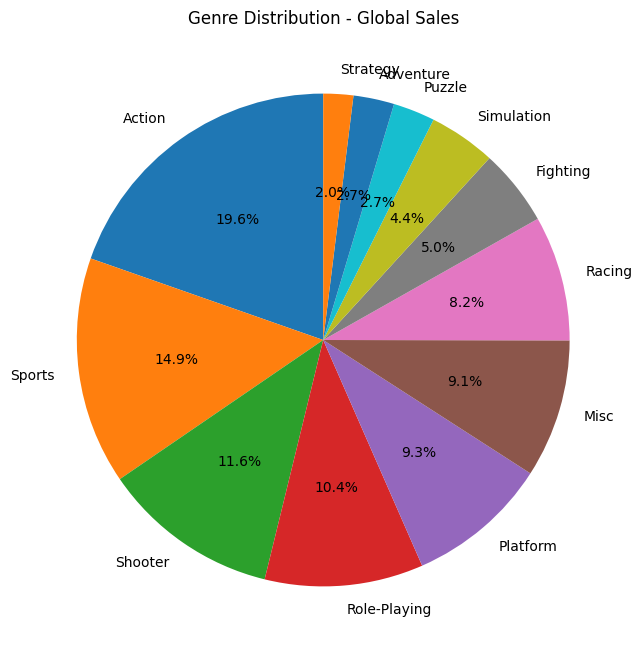

In [5]:
genre_sales = vgs.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Creating the pie chart
genre_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Genre Distribution - Global Sales')
plt.ylabel('')
plt.show()

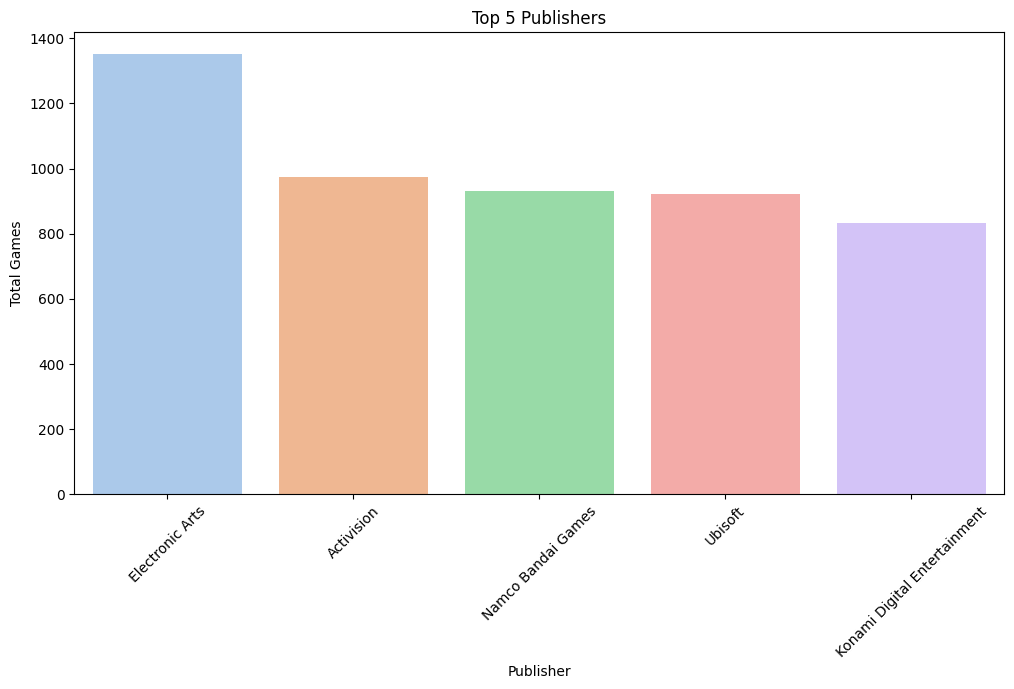

In [ ]:
top_publishers = vgs['Publisher'].value_counts().sort_values(ascending=False).head(5)

#Creating the second visualization.
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='pastel')
plt.title('Top 5 Publishers') #labelling the data.
plt.xlabel('Publisher')  #labelling the x-label.
plt.ylabel('Total Games') #labelling the y-label.

plt.xticks(rotation=45)
plt.show()


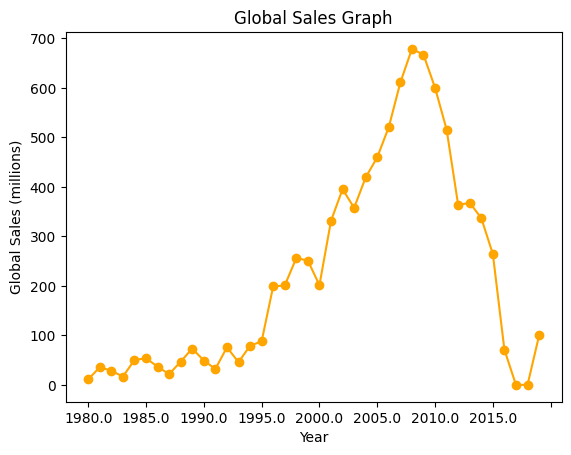

In [ ]:
yearly_sales = vgs.groupby('Year')['Global_Sales'].sum()

#Creating the third visualization.
yearly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Global Sales Graph')   #labelling the data.
plt.xlabel('Year')  #labelling the x-label.
plt.ylabel('Global Sales (millions)') #labelling the y-label.
plt.show()

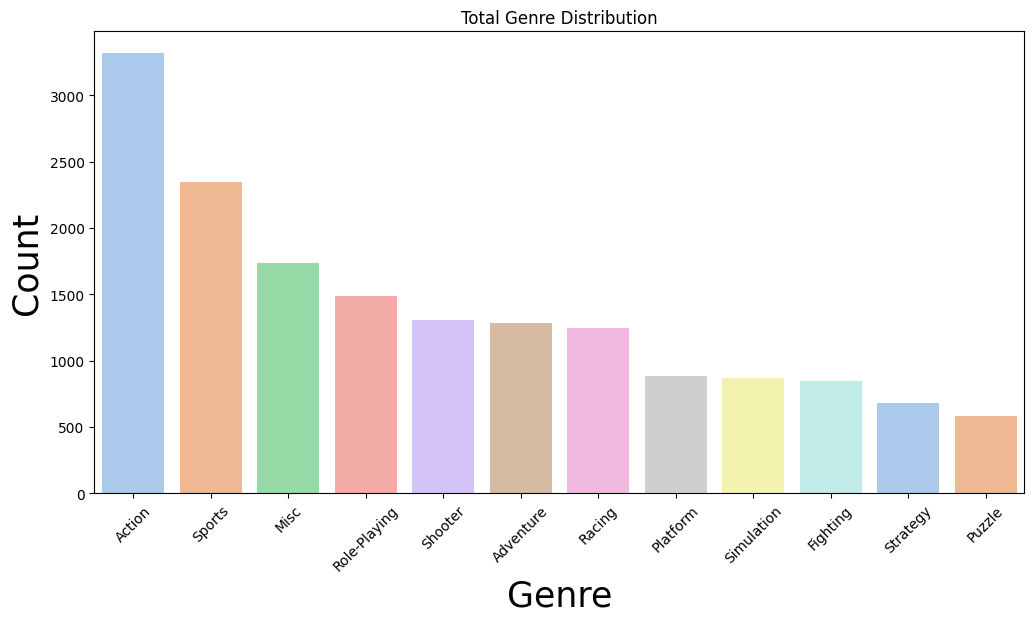

In [ ]:
genre_counts = vgs['Genre'].value_counts()

#Creating the fourth visualization.
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='pastel')
plt.title('Total Genre Distribution')   #labelling the data.
plt.xlabel('Genre',fontsize=25)   #labelling the x-label.
plt.ylabel('Count',fontsize=25)   #labelling the y-label.
plt.xticks(rotation=45)
plt.show()

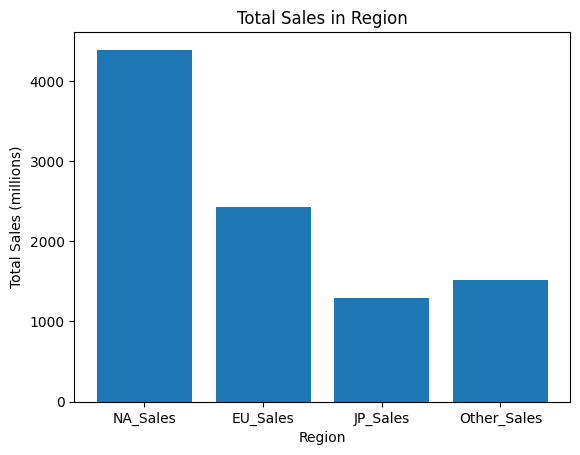

In [ ]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_data = vgs[regions].sum()

plt.bar(regions, sales_data)
plt.title('Total Sales in Region')  # labelling the data.
plt.xlabel('Region')  # labelling the x-label
plt.ylabel('Total Sales (millions)') # labelling the y-label.
plt.show()